In [3]:
import os
import joblib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("/home/riri/Desktop/Soiling/datasets/soiling.csv")
df.head()

,client,gender,age,hours_slept,sleep_quality,main_food_taken,food_taken_amount,drink,temperature(deg),exercise,medication,breakfast_time,lunch_time,supper_time,visit_restroom,times_visited,avg_relieve_time(min),soiled
0,Geraldine,Male,12,7,Excellent,Meat,Normal,Milk,18.1,Yes,No,08:51,12:33,19:13,Yes,4,17,Yes
1,Wendy,Female,13,8,Excellent,Rice,Heavy,Coffee,20.8,Yes,No,08:38,13:01,18:12,Yes,5,25,No
2,Morgan,Female,6,8,Excellent,Veggies,Small,Water,19.2,Yes,No,09:09,13:42,19:54,Yes,3,18,Yes
3,Denis,Female,8,9,Concerning,Fruits,Heavy,Coffee,19.0,No,Yes,09:15,12:49,18:11,Yes,3,22,No
4,Barnett,Male,9,8,Excellent,Rice,Small,Milk,18.1,Yes,Yes,08:34,13:46,18:09,No,0,22,Yes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28532.0,7.995899,2.011921,0.0,7.0,8.0,9.0,16.0
hours_slept,28532.0,7.008692,1.040955,2.0,6.0,7.0,8.0,11.0
temperature(deg),28532.0,20.513077,3.525494,6.0,18.1,20.5,22.9,34.0
times_visited,28532.0,1.493902,1.670859,0.0,0.0,0.0,3.0,7.0
avg_relieve_time(min),28532.0,20.008166,2.026282,12.0,19.0,20.0,21.0,28.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28532 entries, 0 to 28531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client                 28532 non-null  object 
 1   gender                 28532 non-null  object 
 2   age                    28532 non-null  int64  
 3   hours_slept            28532 non-null  int64  
 4   sleep_quality          28532 non-null  object 
 5   main_food_taken        28532 non-null  object 
 6   food_taken_amount      28532 non-null  object 
 7   drink                  28532 non-null  object 
 8   temperature(deg)       28532 non-null  float64
 9   exercise               28532 non-null  object 
 10  medication             28532 non-null  object 
 11  breakfast_time         28532 non-null  object 
 12  lunch_time             28532 non-null  object 
 13  supper_time            28532 non-null  object 
 14  visit_restroom         28532 non-null  object 
 15  ti

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


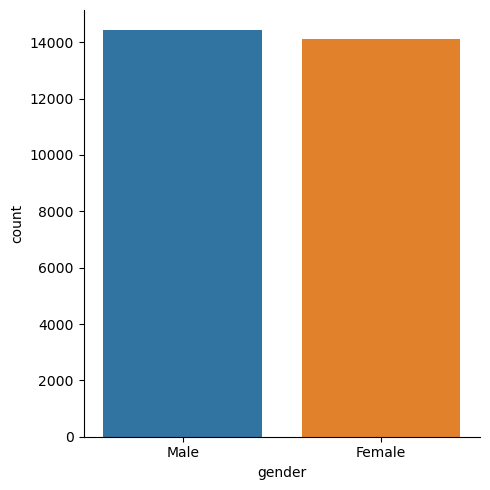

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


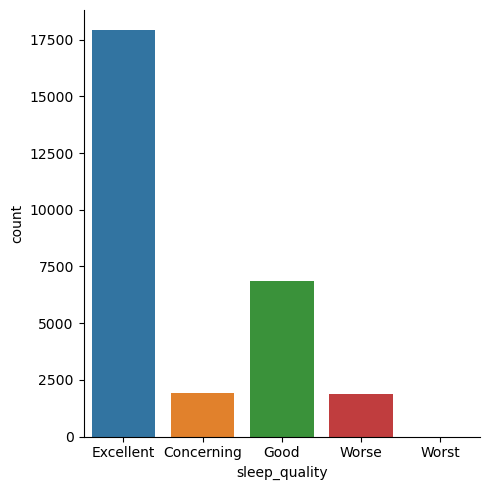

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


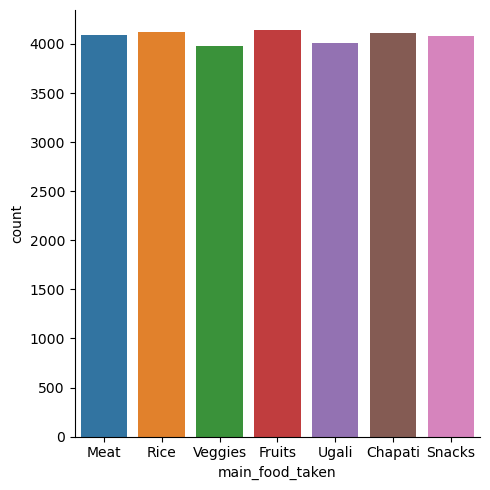

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


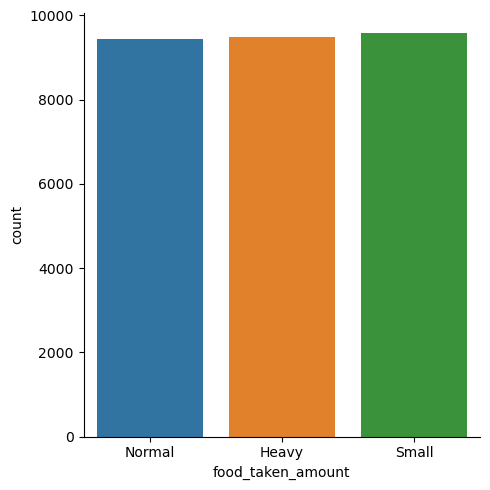

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


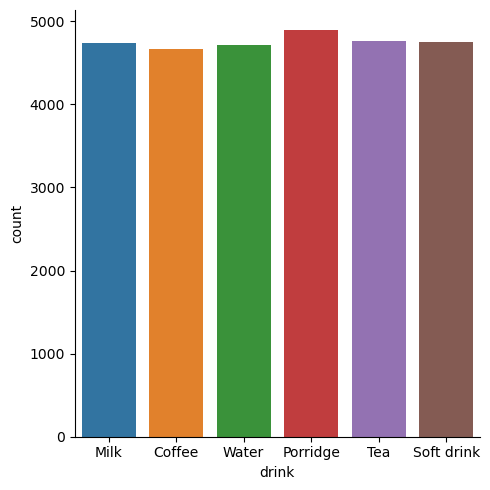

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


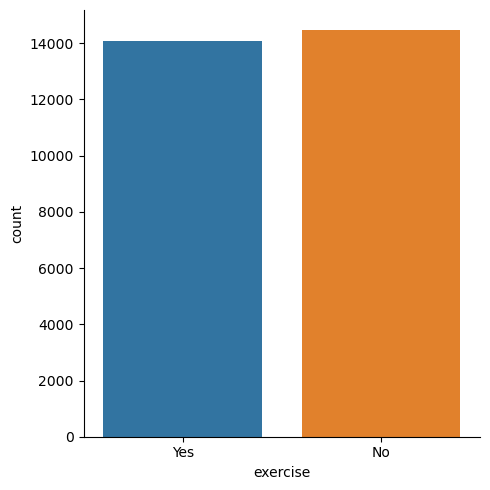

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


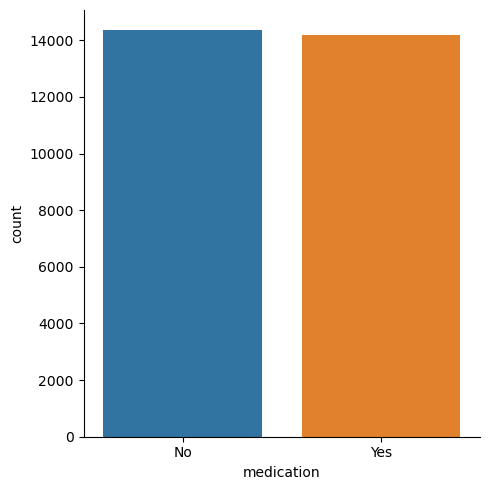

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


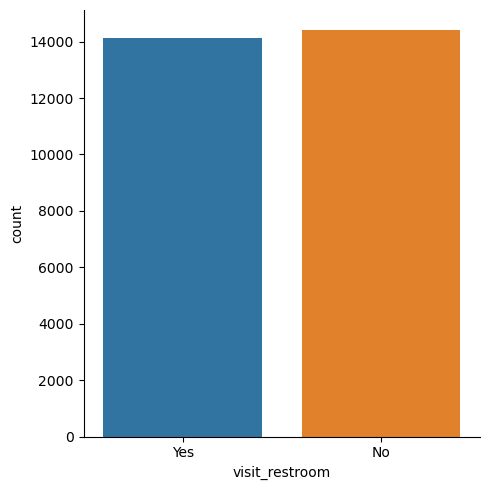

/home/riri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_123980/394113160.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


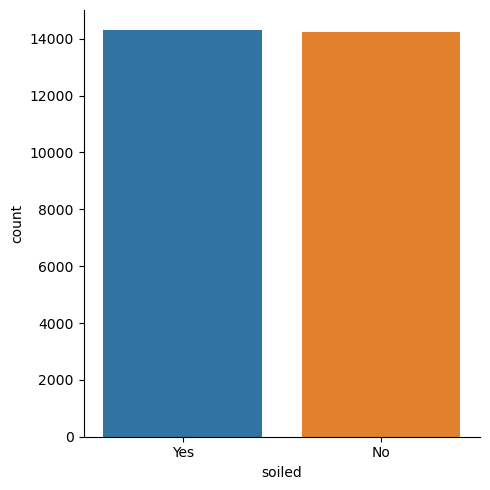

In [8]:
for col in df.select_dtypes(include=['object', 'category']):
    if col not in ['client', 'breakfast_time', 'lunch_time', 'supper_time']:
        sns.catplot(data=df, x=col, kind="count")
        plt.tight_layout()
        plt.show();

In [39]:
df.drop(columns=['client', 'soiled'])

for col in df.select_dtypes(include=['object']):
    if col not in ('client', 'soiled'):
        ct = pd.crosstab(df['soiled'], df[col])
        chi, p_value, dof, expected = chi2_contingency(ct) 
        if p_value <= 0.05:
            hypo = "Reject"
        else:
            hypo = "Accept"
            
        print(f"************** {str(col).replace('_', ' ').title()}: {df[col].nunique()} **************")
        print(f"chi: {chi:.5f}\np-value: {p_value:.5f}\nDegree: {dof}\nNull Hypothesis: {hypo}\n")

************** Gender: 2 **************
chi: 0.64198
p-value: 0.42300
Degree: 1
Null Hypothesis: Accept

************** Sleep Quality: 5 **************
chi: 9.17682
p-value: 0.05683
Degree: 4
Null Hypothesis: Accept

************** Main Food Taken: 7 **************
chi: 4.70911
p-value: 0.58163
Degree: 6
Null Hypothesis: Accept

************** Food Taken Amount: 3 **************
chi: 0.45844
p-value: 0.79516
Degree: 2
Null Hypothesis: Accept

************** Drink: 6 **************
chi: 2.31086
p-value: 0.80467
Degree: 5
Null Hypothesis: Accept

************** Exercise: 2 **************
chi: 0.49799
p-value: 0.48039
Degree: 1
Null Hypothesis: Accept

************** Medication: 2 **************
chi: 4.78915
p-value: 0.02864
Degree: 1
Null Hypothesis: Reject

************** Breakfast Time: 121 **************
chi: 110.99825
p-value: 0.70985
Degree: 120
Null Hypothesis: Accept

************** Lunch Time: 91 **************
chi: 77.23513
p-value: 0.82900
Degree: 90
Null Hypothesis: Accept

**

In [49]:
df.duplicated(subset=['client', 'age', 'gender']).sum()

14529

In [50]:
data = df.drop_duplicates(subset=['client', 'age', 'gender'], keep='first')

X = data.drop(columns=['client', 'breakfast_time', 'lunch_time', 'supper_time', 'soiled'], axis=1)
y = data['soiled']

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


def preprocess_inputs(data: pd.DataFrame):
    cat_columns = [col for col in data.select_dtypes(include=['object', 'category'])]
    num_columns = [col for col in data.select_dtypes(include=['int', 'float'])]
    
    cat_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(sparse_output=False))
    ])
    
    num_pipe = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])  
        
    transformer = ColumnTransformer(transformers=[
        ("categorical", cat_pipe, cat_columns),
        ("numerical", num_pipe, num_columns)
    ])
    
    preprocessed = transformer.fit_transform(data)
    
    return preprocessed

In [52]:
le = LabelEncoder()
y = le.fit_transform(y)
new_x = preprocess_inputs(X)

X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size=0.25, random_state=42)

In [53]:
X_train.shape, X_test.shape, y_train.shape

((10502, 33), (3501, 33), (10502,))

In [54]:
from sklearn.base import ClassifierMixin
from sklearn.model_selection import StratifiedKFold
import numpy as np

def run_classifier(model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray):
    scores = []
    
    # kfold = StratifiedKFold()
    
    # for (train_idx, val_idx) in enumerate(kfold.split(X, y)):
    #     X_train, X_test = X[train_idx], 
        
        
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    
    return score

In [55]:
lr = LogisticRegression()
run_classifier(lr, X_train, y_train, X_test, y_test)

0.4961439588688946

In [56]:
xgb = XGBClassifier()
run_classifier(xgb, X_train, y_train, X_test, y_test)

0.4912882033704656

In [57]:
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

In [58]:
xgb.score(X_train, y_train)

0.8056560655113312

In [59]:
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

          No       0.50      0.50      0.50      1779
         Yes       0.48      0.49      0.48      1722

    accuracy                           0.49      3501
   macro avg       0.49      0.49      0.49      3501
weighted avg       0.49      0.49      0.49      3501



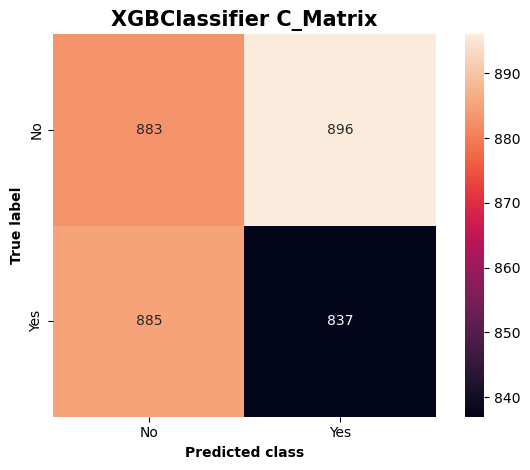

In [61]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, square=True, cbar=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBClassifier C_Matrix", weight='bold', size=15)
plt.xlabel("Predicted class", weight="bold", size=10)
plt.ylabel("True label", weight='bold', size=10)
plt.tight_layout()
plt.show();